In [6]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("exoplanet_data.csv")
X = data.iloc[:,1:40]  #independent columns
y = data.iloc[:,0]    #target column i.e price range
data.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

[0.13176607 0.16246833 0.12845179 0.0546381  0.01923964 0.01393622
 0.01370147 0.0126542  0.02022763 0.02184556 0.0126213  0.0128716
 0.01016797 0.01875662 0.03062416 0.03090703 0.02168976 0.01315187
 0.01240832 0.01433458 0.01075785 0.01068178 0.01325553 0.00927202
 0.00927318 0.00885403 0.03244122 0.00916543 0.01054373 0.02267033
 0.01913176 0.01113336 0.01112307 0.01331284 0.00926766 0.01192674
 0.00905334 0.01148721 0.01018668]


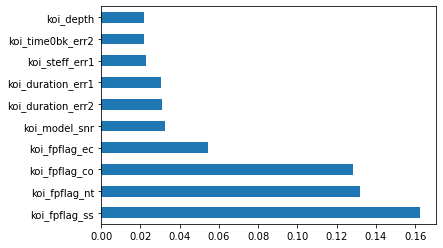

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [19]:
feat_importances.nlargest(10)


koi_fpflag_ss        0.162468
koi_fpflag_nt        0.131766
koi_fpflag_co        0.128452
koi_fpflag_ec        0.054638
koi_model_snr        0.032441
koi_duration_err2    0.030907
koi_duration_err1    0.030624
koi_steff_err1       0.022670
koi_time0bk_err2     0.021846
koi_depth            0.021690
dtype: float64

In [12]:
def functionrand(x):
    if x == 'CONFIRMED':
        return 1
    else:
        return 0
y = y.apply(functionrand)
y[:5]

0    1
1    0
2    0
3    1
4    1
Name: koi_disposition, dtype: int64